In [98]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import pydot
import os
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
os.environ["PATH"] += os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'

In [99]:
from sklearn.datasets import load_wine
wine = load_wine()

In [100]:
scaler = StandardScaler()
X = scaler.fit_transform(wine.data)
y = wine.target

In [101]:
# knn과 마찬가지로 각 data set을 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=123)
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, test_size= 0.112, random_state=123)

In [102]:
depth_val = np.arange(1,10) # tree의 size로 2붜 9까지 실험
valid_scores1=[] # entropy를 기준으로 설정한 모델의 validation set accuracy 저장
valid_scores2=[] # gini계수를 기준으로 설정한 모델의 validatino set accuracy 저장
test_score1=[] # entropy 모델의 test score 저장
test_score2=[] # gini 모델의 test score 저장

for depth in depth_val:
    tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    tree2 = DecisionTreeClassifier(criterion='gini', max_depth=depth)
            
    tree1.fit(X_subtrain, y_subtrain)
    tree2.fit(X_subtrain, y_subtrain)
            
    valid_scores1.append(tree1.score(X_val, y_val))
    valid_scores2.append(tree2.score(X_val, y_val))
    
    tree1.fit(X_train, y_train)
    tree2.fit(X_train, y_train)
            
    test_score1.append(tree1.score(X_test, y_test))
    test_score2.append(tree2.score(X_test, y_test))
            

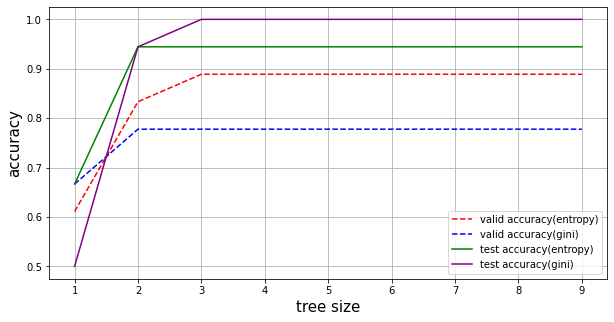

In [103]:
# 빨간선은 Nanhattan distance 사용, 파란선은 Euclidean distance 사용
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(depth_val, valid_scores1, c='r', label='valid accuracy(entropy)', ls='--')
plt.plot(depth_val, valid_scores2, c='b', label='valid accuracy(gini)', ls='--')
plt.plot(depth_val, test_score1, c='g', label='test accuracy(entropy)')
plt.plot(depth_val, test_score2, c='purple', label='test accuracy(gini)')
plt.xlabel("tree size", size= 15)
plt.ylabel("accuracy", size= 15)
plt.legend()
plt.show()

In [104]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree2 = DecisionTreeClassifier(criterion='gini', max_depth=3)

tree1.fit(X_train, y_train)
tree2.fit(X_train, y_train)

print("accuracy in tree(entropy) : {:.3f}".format(tree1.score(X_test, y_test)))
print("accuracy in tree(gini)    : {:.3f}".format(tree2.score(X_test, y_test)))

accuracy in tree(entropy) : 0.944
accuracy in tree(gini)    : 1.000


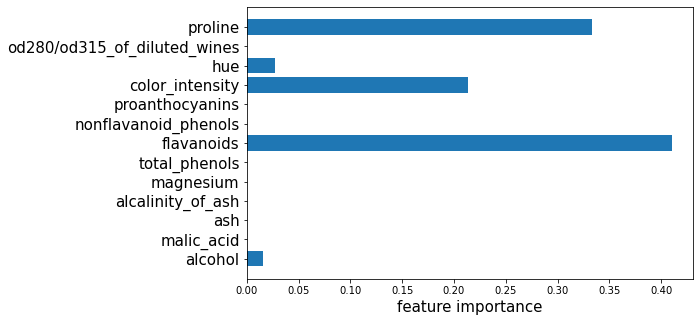

In [105]:
# 와인데이터의 feature들의 중요도를 나타낸 자료로
# 매번 다르게 측정되지만 전반적으로 proline, flavanoid와 같은 몇몇 특성들은 매번 높게 측정됨
importances = tree1.feature_importances_
features = wine.data.shape[1]
idx = np.arange(features)

plt.figure(figsize=(8,5))
plt.barh(idx, importances)
plt.yticks(idx, wine.feature_names, size= 15)
plt.xlabel('feature importance', size=15)
plt.show()

In [106]:
# ,png 파일로 생성된 트리 모델을 저장
export_graphviz(tree1, out_file='decisionTree1.dot',
               class_names=wine.target_names,
               feature_names=wine.feature_names,
               impurity=True,
               filled=True,
               rounded=True,
               special_characters=True)
(graph,) = pydot.graph_from_dot_file('decisionTree1.dot')
graph.write_png("decisionTree1.png")
# decision tree를 시각화

export_graphviz(tree2, out_file='decisionTree2.dot',
               class_names=wine.target_names,
               feature_names=wine.feature_names,
               impurity=True,
               filled=True,
               rounded=True,
               special_characters=True)
(graph,) = pydot.graph_from_dot_file('decisionTree2.dot')
graph.write_png("decisionTree2.png")